#Orthogonality

If a matrix $C$ has orthogonal cloumns, then $C^TC = I$, because 
$$C^TC = \begin{pmatrix} --- c_1 --- \\ --- c_2 --- \\ --- \vdots ---\\ --- c_k --- \end{pmatrix} \begin{pmatrix} \vdots & \vdots & \vdots & \vdots \\ c_1 & c_2 & \ldots & c_k \\ \vdots & \vdots & \vdots & \vdots\end{pmatrix} = \mathbf{I}$$ 

If a matrix $R$ has orthogonal rows, then $RR^T = I$, because 
$$RR^T = \begin{pmatrix} --- r_1 --- \\ --- r_2 --- \\ --- \vdots ---\\ --- r_k --- \end{pmatrix}  \begin{pmatrix} \vdots & \vdots & \vdots & \vdots \\ r_1 & r_2 & \ldots & r_k \\ \vdots & \vdots & \vdots & \vdots\end{pmatrix} = \mathbf{I}$$

For square matrices $A,B$, we know that if $AB=\mathbf{I}$ then $BA=\mathbf{I}$.

Therefore, if $M$ is square with orthonormal cloumns ($M^TM=\mathbf{I}$), then $MM^T = \mathbf{I}$. So $M$ also has orthonormal rows. Same goes for rows implying columns.

These are **orthogonal matrcies**. An *orthogonal matrix* is a square matrix with real entries whose columns and rows are orthogonal unit vectors (i.e., orthonormal vectors). In thise case $M^T = M^{-1}$.

#SVD - circles to ellipses

In [325]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

(-1, 1)

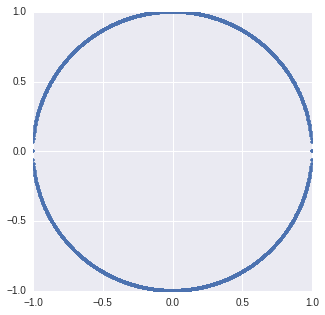

In [326]:
#generate points on a unit circle

xs = np.linspace(-1, 1, 1000)
ys = np.sqrt(1-xs**2)

xs = np.append(xs, xs)
ys = np.append(ys, -ys)

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(xs,ys,'.')

plt.xlim([-1,1])
plt.ylim([-1,1])

(-5, 5)

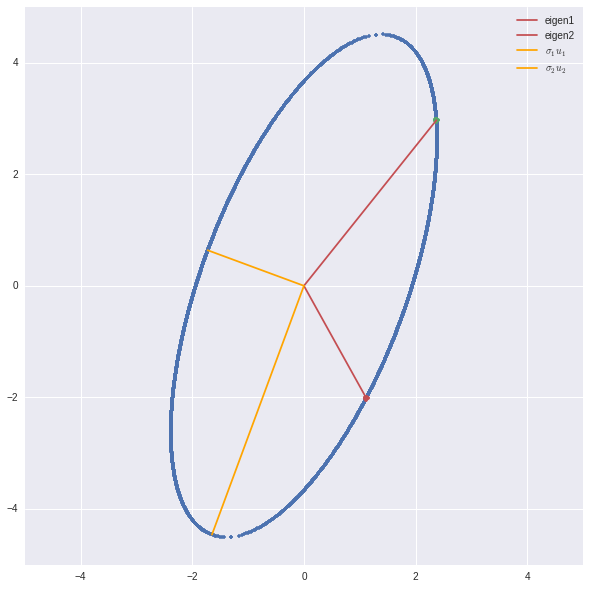

In [327]:
#map the circle via the matrix A
A = np.array([[1.3,2], [4.5, 0.2]])
#A = 4*np.random.rand(2,2)
eigenval, eigenvec = np.linalg.eig(A)

mapped=[]
for x,y in zip(xs,ys):
    mapped.append(np.dot(A,np.array([x, y])))
#print zip(xs, ys)
#print mapped
fig, ax = plt.subplots(1,1,figsize=(10,10))
#fig = plt.figure()
#ax = fig.add_subplot(121, figsize=(10, 10))
newx = [item[0] for item in mapped]
newy = [item[1] for item in mapped]
ax.plot(newx, newy, '.')


#plot eigenvectors
eign_x1 = eigenval[0]*eigenvec[0,0]
eign_y1 = eigenval[0]*eigenvec[1,0]
eign_x2 = eigenval[1]*eigenvec[0,1]
eign_y2 =  eigenval[1]*eigenvec[1,1]

ax.plot(eign_x1, eign_y1, 'o')
ax.plot(eign_x2, eign_y2, 'o')


line1 = plt.Line2D([0,eign_x1], [0,eign_y1], color='r', label='eigen1')
ax.add_line(line1)
line2 = plt.Line2D([0,eign_x2], [0,eign_y2], color='r', label='eigen2')
ax.add_line(line2)



#SVD stuff
U, s, V = np.linalg.svd(A)
line3 = plt.Line2D([0,s[0]*U[0,0]], [0,s[0]*U[1,0]], color='orange', label='$\sigma_1u_1$')
ax.add_line(line3)
line4 = plt.Line2D([0,s[1]*U[0,1]], [0,s[1]*U[1,1]], color='orange', label='$\sigma_2u_2$')
ax.add_line(line4)


plt.legend(handles=[line1, line2, line3, line4], loc=1)

plt.xlim([-5,5])
plt.ylim([-5,5])

#SVD
$Av_j = \sigma_j u_j \text{ for } j=1,\ldots, n$

where

$v_j$ are the **right singular vectors** of A;

$u_j$ are the **left singular vectors** of A;

$\sigma_j$ are the **singular values** of A;

$u_j$ is a vector on the principle axis of the ellipse given by $A$; $\sigma_j$ is how much it gets stretched; $v_j$ is the vector on the unit circle that gets sent to it.

In matrix form: $$A = U \Sigma V$$

$$A^{m \times n} = U^{m \times n}\;\; \Sigma^{n \times n}\;\; V^{n \times n}$$

$\Sigma$ is diagonal;

$U$ has orthonormal columns ($\in \mathbf{R}^m$);

$V$ has orthonormal columns (and therefore rows, since it's square).

#FINDING THE SVD

##use the eigendecomposition:

$\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}$  
where $\mathbf{Q}$ is the square matrix whose $i$th column is the eigenvector $q_i$ of $\mathbf{A}$ and $\mathbf{Λ}$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues

In [328]:
A

array([[ 1.3,  2. ],
       [ 4.5,  0.2]])

In [329]:
eigenval, eigenvec = np.linalg.eig(A)
print eigenval
print eigenvec

[ 3.8 -2.3]
[[ 0.62469505 -0.48564293]
 [ 0.78086881  0.87415728]]


In [330]:
np.dot(np.dot(eigenvec, np.diag(eigenval)), np.linalg.inv(eigenvec))

array([[ 1.3,  2. ],
       [ 4.5,  0.2]])

#How does this help?

$A = U \Sigma V$, so we use two facts, recalling that $V$ is orthnoromal ($V^{-1} = V^T$):

$$A^TA = \left(V^T \Sigma^T U^T\right)  U \Sigma V = V^T \Sigma^2 V = V \Sigma^2 V^{-1};$$


So $\Sigma$ is the square root of the diagonal eigenvalue matrix of $A^TA$, which we know how to find, and $V$ is the eigenvector matrix of $A^TA$, which we know how to find.

To find $U$, we use

$$AV^T = U \Sigma V V^T = U \Sigma,$$

so that $U = AV^T\Sigma^{-1}$.

In [331]:
eigenval, eigenvec = np.linalg.eig(np.dot(np.transpose(A),A))
print eigenval
print eigenvec

[ 22.60002081   3.37997919]
[[ 0.98267989 -0.18531119]
 [ 0.18531119  0.98267989]]


In [332]:
V = np.transpose(eigenvec)
S = np.sqrt(np.diag(eigenval))
U = np.dot(np.dot(A, np.transpose(V)), np.linalg.inv(S))

In [333]:
np.dot(np.dot(U, S), V)

array([[ 1.3,  2. ],
       [ 4.5,  0.2]])

In [334]:
A

array([[ 1.3,  2. ],
       [ 4.5,  0.2]])

#Norms, rotations, and scalings

$||\mathbf{v}||^2 = \sum v_i^2 = \mathbf{v}^T \mathbf{v}$

What happens when we apply a matrix $\mathbf{M}$ having orthonormal columns to $\mathbf{v}$?

$||\mathbf{M}\mathbf{v}||^2 =  \mathbf{v}^T\mathbf{M}^T \mathbf{M} \mathbf{v}  = \mathbf{v}^T \mathbf{v} = ||\mathbf{v}||^2$,

so $\mathbf{M}$ might rotate $\mathbf{v}$, but does not scale it.

In the SVD setting,

$\mathbf{A}\mathbf{v} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}\mathbf{v}$,

so $\mathbf{V}$ rotates, $\mathbf{\Sigma}$ scales (which might stretch differently in different directions), and $\mathbf{U}$ rotates.

[[ 4.75394792  0.        ]
 [ 0.          1.83847197]]
[[ 0.34668159  0.93798287]
 [ 0.93798287 -0.34668159]]


(-5, 5)

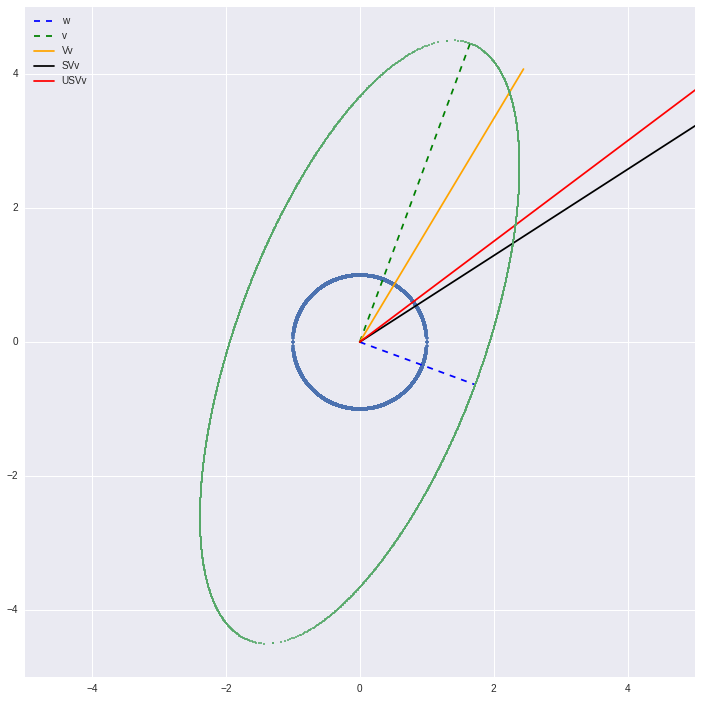

In [335]:
fig, ax = plt.subplots(1,1,figsize=(12,12))

ax.plot(xs,ys,'.')

v = np.array(S[0,0]*U[:, 0])


print S

print U



w = np.array(S[1,1]*U[:, 1])
line11 = plt.Line2D([0,w[0]], [0,w[1]], linestyle='--', color='blue', label='w')
ax.add_line(line11)
#v = np.array(U[:, 0])

line1 = plt.Line2D([0,v[0]], [0,v[1]], linestyle='--', color='green', label='v')
ax.add_line(line1)

Vv = np.dot(V, v)
line2 = plt.Line2D([0,Vv[0]], [0,Vv[1]], color='orange', label='Vv')
ax.add_line(line2)

SVv = np.dot(S, Vv)
line3 = plt.Line2D([0,SVv[0]], [0,SVv[1]], color='black', label='SVv')
ax.add_line(line3)

USVv = np.dot(U, SVv)
line4 = plt.Line2D([0,USVv[0]], [0,USVv[1]], color='red', label='USVv')
ax.add_line(line4)


newx = [item[0] for item in mapped]
newy = [item[1] for item in mapped]
ax.plot(newx, newy, '.', markersize=4)


plt.legend(handles=[line11, line1, line2, line3, line4], loc=2)

plt.xlim([-5,5])
plt.ylim([-5,5])